In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target


In [ ]:
print("Number of Features",len(X[0]))
print("Printing 1st row",X[0])

Number of Features 10
Printing 1st row [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error on Validation Set: {mse}")


Mean Squared Error on Validation Set: 3242.076936830104


In [ ]:
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on Test Set: {mse_test}")

Mean Squared Error on Test Set: 2781.052475588295


#Cross Validation

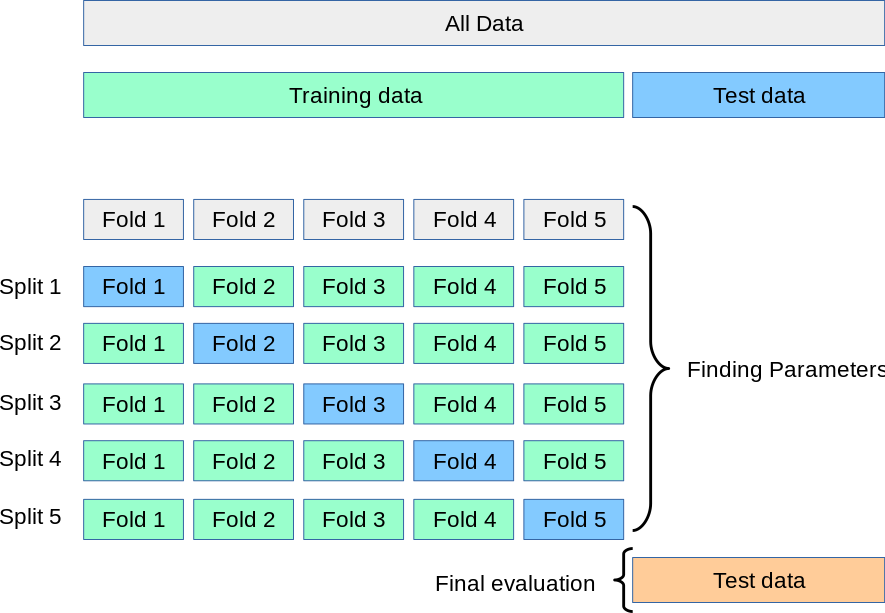

In [ ]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = LinearRegression()

for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model.fit(X_train_fold, y_train_fold)
    y_val_pred_fold = model.predict(X_val_fold)

    mse_fold = mean_squared_error(y_val_fold, y_val_pred_fold)
    print(f"Fold {fold + 1}: Mean Squared Error on Validation Set: {mse_fold}")


y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"\nMean Squared Error on Test Set: {mse_test}")


Fold 1: Mean Squared Error on Validation Set: 3121.525722333602
Fold 2: Mean Squared Error on Validation Set: 2595.0031649549887
Fold 3: Mean Squared Error on Validation Set: 3656.5018037497516
Fold 4: Mean Squared Error on Validation Set: 3323.984851387648
Fold 5: Mean Squared Error on Validation Set: 3450.9782556602718

Mean Squared Error on Test Set: 2862.6053473321704


Train Index for fold 0 [  0   1   2   4   6   8  10  11  12  13  14  15  16  18  19  20  21  22
  23  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  43  44
  47  48  49  50  51  52  53  54  55  56  58  59  61  62  64  65  66  67
  68  69  70  71  72  74  78  79  80  81  83  85  86  87  88  89  90  91
  94  95  96  97  98  99 100 102 103 105 106 107 109 110 111 112 115 116
 117 118 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 138 139 140 141 142 143 144 146 147 148 149 150 151 152 153 154 156
 157 159 160 161 162 165 166 167 169 170 171 172 174 175 176 177 178 180
 182 183 185 186 187 188 189 190 191 192 193 194 199 200 201 202 203 204
 205 207 208 209 211 212 213 214 215 216 217 218 219 220 221 222 223 225
 227 228 229 231 232 233 234 235 236 237 238 240 241 243 245 246 247 248
 249 250 252 253 254 255 256 257 258 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 275 276 277 278 279 280 281 282 283 285 287 290 291
 292 293 294 296 298 299 300

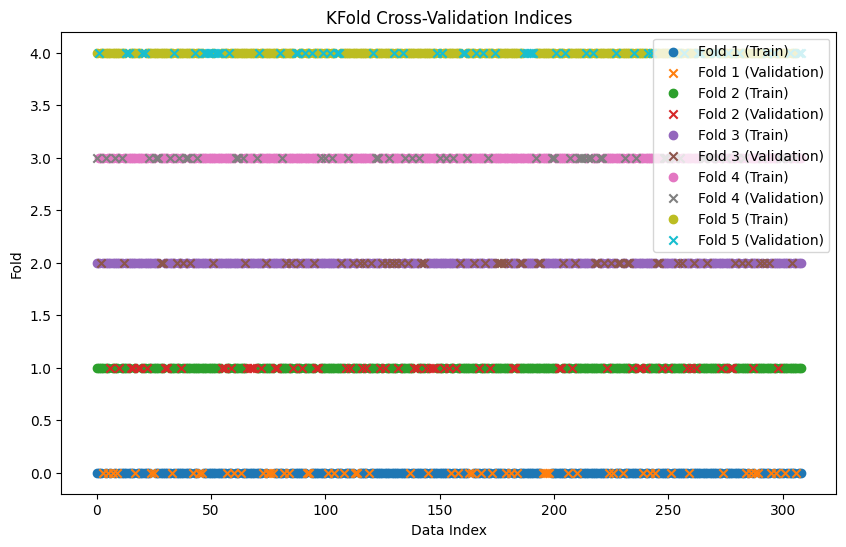

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Plot the indices for each fold
fig, ax = plt.subplots(figsize=(10, 6))

for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    ax.scatter(train_index, [fold] * len(train_index), label=f'Fold {fold + 1} (Train)', marker='o')
    ax.scatter(val_index, [fold] * len(val_index), label=f'Fold {fold + 1} (Validation)', marker='x')
    print(f"Train Index for fold {fold}", train_index )
    print(f"Val Index for fold {fold}", val_index )
ax.set_xlabel('Data Index')
ax.set_ylabel('Fold')
ax.set_title('KFold Cross-Validation Indices')
ax.legend()
plt.show()


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

california_housing = fetch_california_housing()
X_california = california_housing.data
y_california = california_housing.target

print("California Housing Dataset:")
print(f"X_train shape: {X_california.shape}, y_train shape: {X_california.shape}")


California Housing Dataset:
X_train shape: (20640, 8), y_train shape: (20640, 8)


#Lab Task
Reimplement the above lab on the California Housing dataset.